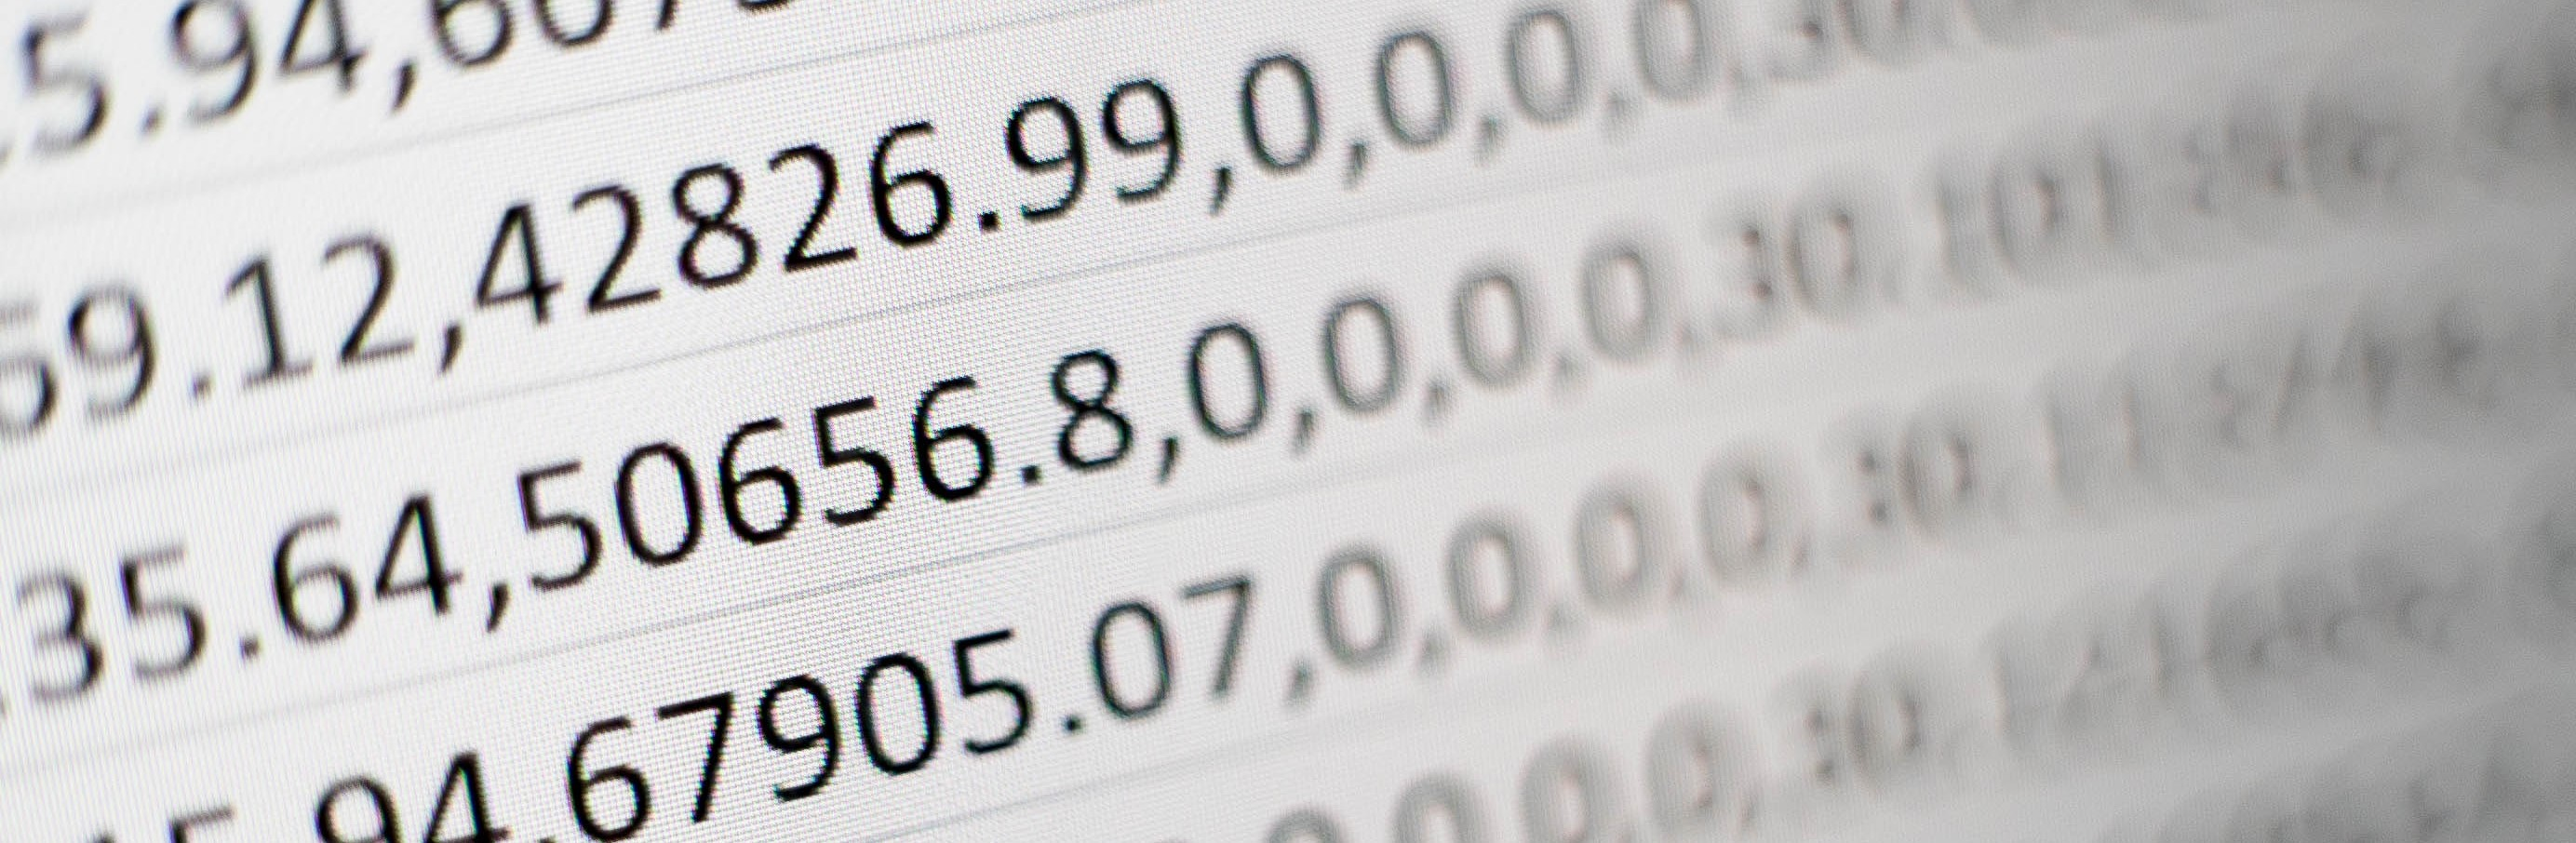
*Imagem de domínio gratuito*


# Análise exploratória de dados para área de varejo




# Introdução

A análise exploratória de dados com Python é um processo de investigação de um conjunto de dados para descobrir padrões, identificar anomalias e obter insights que possam ajudar a tomar decisões informadas. O Python é uma linguagem de programação popular para análise de dados, com bibliotecas como Pandas, NumPy e Matplotlib que permitem manipulação, análise e visualização de dados.

No contexto do varejo, a análise exploratória de dados pode ser usada para obter insights valiosos sobre o comportamento do consumidor, tendências de vendas, perfil do cliente e desempenho de produtos. Com essas informações, os varejistas podem tomar decisões estratégicas, como ajustar preços, melhorar a seleção de produtos, otimizar campanhas de marketing e aprimorar a experiência do cliente.

Algumas análises exploratórias comuns para o varejo incluem:

Análise de vendas por região, categoria de produto, data, etc.

Análise do comportamento do cliente, como frequência de compras, valor médio do carrinho, produtos mais comprados juntos, etc.

Análise de preços, como comparação com a concorrência, efeito sobre as vendas, etc.

Análise de estoque, como níveis de estoque em diferentes locais, tempo médio de reposição, etc.

A análise exploratória de dados com Python pode ajudar os varejistas a entender melhor seus clientes, seus produtos e seu desempenho no mercado, permitindo que tomem decisões mais informadas e estratégicas.


objetivo é responder 10 perguntas de negócio a partir de um dataset sobre uma rede de varejo que comercializa diversos produtos em diversas cidades dos EUA. 

Os dados são reais e foram extraídos do link abaixo:

https://community.tableau.com/s/question/0D54T00000CWeX8SAL/sample-superstore-sales-excelxls


Vamos analisar os dados e então responderemos essas 10 perguntas:

**Pergunta de Negócio 1**: 

Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?

**Pergunta de Negócio 2**:

Qual o Total de Vendas Por Data do Pedido ao longo do tempo? Demonstre o resultado através de um gráfico de barras.

**Pergunta de Negócio 3**:

Qual o Total de Vendas por Estado?Demonstre o resultado através de um gráfico de barras.

**Pergunta de Negócio 4**:

Quais São as 10 Cidades com Maior Total de Vendas?Demonstre o resultado através de um gráfico de barras.

**Pergunta de Negócio 5**:

Qual Segmento Teve o Maior Total de Vendas?Demonstre o resultado através de um gráfico de pizza.

**Pergunta de Negócio 6**:

Qual o Total de Vendas Por Segmento e Por Ano?

**Pergunta de Negócio 7**:

Os  gestores  da  empresa  estão  considerando conceder  diferentes  faixas  de  descontos  e gostariam de fazer uma simulação com base na regra abaixo:

Se o Valor_Venda for maior que 1000 recebe 15% de desconto.

Se o Valor_Venda for menor que 1000 recebe 10% de desconto.

Quantas Vendas Receberiam 15% de Desconto?

**Pergunta de Negócio 8**:

Considere  Que  a  Empresa  Decida  Conceder  o  Desconto  de  15%  do  Item  Anterior.  Qual Seria a Média do Valor de Venda Antes e Depois do Desconto?

**Pergunta de Negócio 9**:

Qual o Média de Vendas Por Segmento, Por Ano e Por Mês?Demonstre o resultado através de gráfico de linha.

**Pergunta de Negócio 10**:

Qual o Total de Vendas Por Categoria e SubCategoria, Considerando Somente as Top 12 SubCategorias?Demonstre tudo através de um único gráfico.





## Se você é uma pessoa não-técnica, leia abaixo

Todos os códigos possuem comentários caso seja necessário. Além disso, ao fim de cada extração de respostas haverá uma explicação para pessoas não-técnicas em linguagem de programação. Afinal de contas, não adianta jogar códigos aqui que não são ou serão interpretados da maneira correta. Portanto fique tranquilo!

# Análise exploratória e preparação dos dados

## Visão geral do dataset

Dados de amostra que aparecem na apresentação do grupo de usuários do Tableau de dezembro. Observação: as localizações geográficas foram alteradas para incluir localizações canadenses (províncias/regiões).








In [ ]:
# importação das bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [ ]:
df = pd.read_csv("dataset.csv") # transformando em dataframe pandas

In [ ]:
df.shape # linhas, colunas

(9700, 11)

In [ ]:
df.head() # 5 primeiros dados para observação

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [ ]:
df.tail() # cauda do dataframe, 5 últimas por padrão

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
9695,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.830
9696,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.320
9697,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.776
9698,CA-2017-105291,30/10/2017,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.620
9699,CA-2018-147032,31/07/2018,LB-16795,Home Office,United States,Wilmington,Delaware,OFF-PA-10003256,Office Supplies,Paper,11.540


In [ ]:
# visualizando as colunas do nosso dataframe

df.columns

Index(['ID_Pedido', 'Data_Pedido', 'ID_Cliente', 'Segmento', 'Pais', 'Cidade',
       'Estado', 'ID_Produto', 'Categoria', 'SubCategoria', 'Valor_Venda'],
      dtype='object')

In [ ]:
# Agora, vamos verificar o tipo de cada dado

df.dtypes # só temos um valor numérico, que é o Valor_Venda

ID_Pedido        object
Data_Pedido      object
ID_Cliente       object
Segmento         object
Pais             object
Cidade           object
Estado           object
ID_Produto       object
Categoria        object
SubCategoria     object
Valor_Venda     float64
dtype: object

In [ ]:
# Já que temos uma coluna numérica, vamos fazer uma análise da mesma.

df["Valor_Venda"].describe()

count     9700.000000
mean       230.469892
std        627.504252
min          0.444000
25%         17.248000
50%         54.272000
75%        209.932500
max      22638.480000
Name: Valor_Venda, dtype: float64

Intepretando os resultados do describe()

count -> Quantidade de valores não-nulos, se nosso dataframe possui 9700 linhas, está tudo dentro da normalidade.

mean -> A média de valores

std  -> Desvio padrão

min  -> Valor mínimo

25%  -> 25% percentil (primeiro quartil)

50%  -> 50% percentil (segundo quartil)

75%  -> 75% percentil (terceiro quartil)

max  -> Valor máximo

name -> Nome da coluna utilizada

dtype -> Tipo do dado, anteriormente visto como numérico

In [ ]:
# Verificando se existem dados duplicados

print(df[df.duplicated()])

print("\nComo não houve retorno, os dados não estão duplicados")

Empty DataFrame
Columns: [ID_Pedido, Data_Pedido, ID_Cliente, Segmento, Pais, Cidade, Estado, ID_Produto, Categoria, SubCategoria, Valor_Venda]
Index: []

Como não houve retorno, os dados não estão duplicados


In [ ]:
# Verificando se há valores ausentes/nulos

df.isnull().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

E se houvesse valores duplicados, nulos e outros problemas?

Seria necessário uma preparação maior dos dados. como dropar dados nulos com dropna(), exclusão de tabelas duplicadas ou realização de cópias do dataframe para uma versão limpa sem modificar o dataframe original.

# Perguntas

## Pergunta 1: Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?

In [25]:
# vamos criar um novo dataframe filtrando que queremos, que é a categoria Office Supplies

df_p1 = df[df["Categoria"] == "Office Supplies"]

In [26]:
# agrupamento por cidade e depois função sum() para calcular o valor total da venda

df_p1_ag = df_p1.groupby("Cidade")["Valor_Venda"].sum()

In [27]:
cidade_mVenda = df_p1_ag.idxmax() # descobrindo a cidade com maior valor de venda de produtos da categoria solicitada

In [34]:
# Então, temos duas maneiras de responder

# primeiro, se queremos apenas o nome do local, podemos usar a variável cidade_mVenda.

print("A cidade com maior valor de venda de produtos pela categoria 'Office Supplies' é: ", cidade_mVenda)

# Mas, se quisermos os valores numéricos, precisamos printar de maneira decrescente a variável df_p1_ag, que está agrupada

print("\n", df_p1_ag.sort_values(ascending=False))

A cidade com maior valor de venda de produtos pela categoria 'Office Supplies' é:  New York City

 Cidade
New York City    68362.814
Los Angeles      47098.100
San Francisco    41771.198
Seattle          34856.878
Philadelphia     29313.687
                   ...    
Ormond Beach         2.808
Pensacola            2.214
Jupiter              2.064
Elyria               1.824
Abilene              1.392
Name: Valor_Venda, Length: 480, dtype: float64


Temos então que a Cidade de Nova Iorque possui o maior valor de venda de produtos de escritório.

## Pergunta 2: Qual o Total de Vendas Por Data do Pedido ao longo do tempo? Demonstre o resultado através de um gráfico de barras.

In [52]:
# como feito anteriormente, iremos criar um novo df com o cálculo feito, mantendo a integridade do df original

df_p2 = df.groupby("Data_Pedido")["Valor_Venda"].sum()

In [53]:
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,2017-08-11,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,2017-08-11,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,2017-12-06,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,2016-11-10,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,2016-11-10,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


Observação: Como estamos tratando os dados com as datas, precisamos ordenar as datas para que o gráfico faça sentido em sua observação. Portanto no código abaixo eu irei transformar a coluna "Data_Pedido" em uma espécie de index na ordem temporal correta.

In [54]:
df['Data_Pedido'] = pd.to_datetime(df['Data_Pedido'])
type(df.loc[0]['Data_Pedido'])

pandas._libs.tslibs.timestamps.Timestamp

In [59]:
df.tail()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
9695,CA-2018-154116,2018-12-15,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.830
9696,CA-2018-154116,2018-12-15,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.320
9697,CA-2018-154116,2018-12-15,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.776
9698,CA-2017-105291,2017-10-30,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.620
9699,CA-2018-147032,2018-07-31,LB-16795,Home Office,United States,Wilmington,Delaware,OFF-PA-10003256,Office Supplies,Paper,11.540


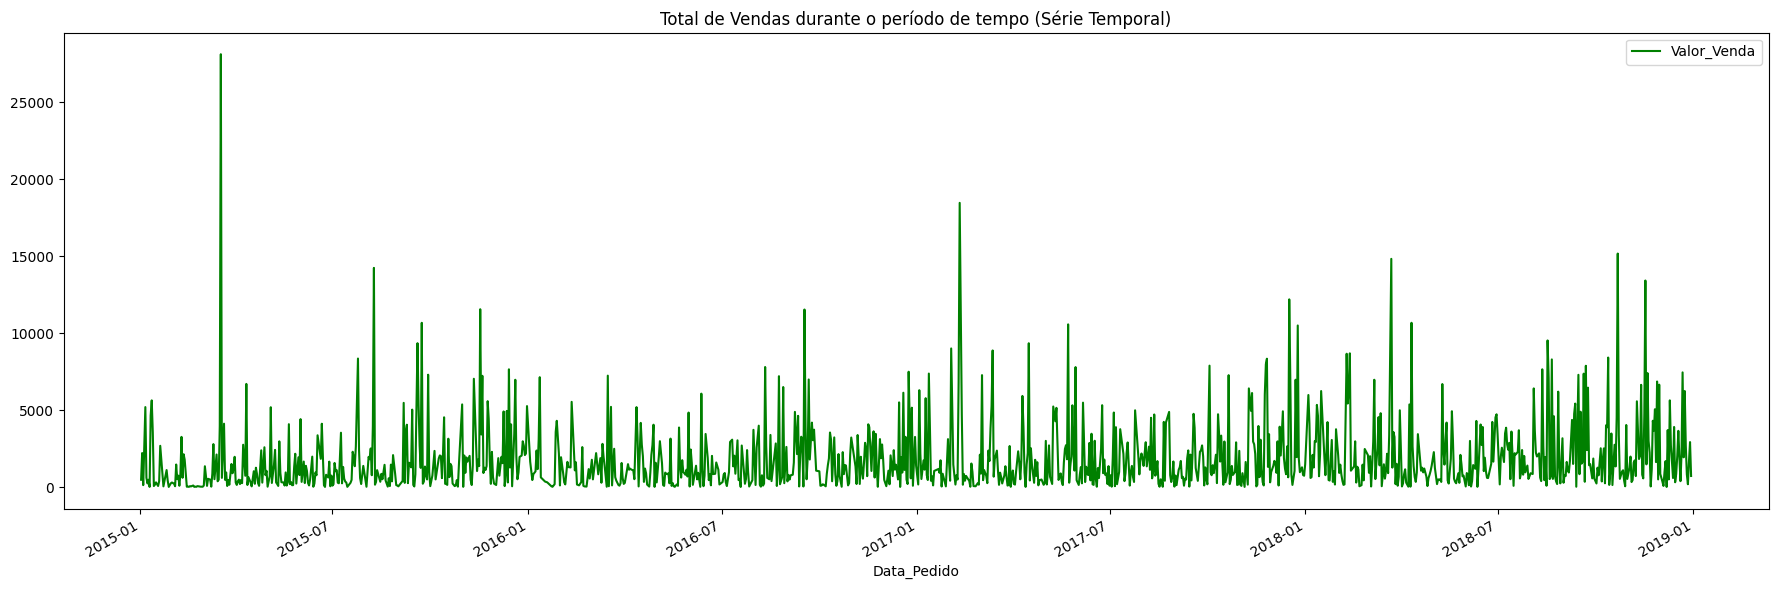

In [61]:
# plotando

plt.figure(figsize=(22,7))
df_p2.plot(x = "Data_Pedido", y = "Valor_Venda", color = "green") # passando os parâmetros do plot
plt.title("Total de Vendas durante o período de tempo (Série Temporal)")
plt.legend()

## Pergunta 3: Qual o Total de Vendas por Estado? Demonstre o resultado através de um gráfico de barras.

In [64]:
# mesmo método de agrupamento anterior, mas repare no reset index que evita com que o index novo fique picotado, ou seja, ele cria um novo index.

df_p3 = df.groupby("Estado")["Valor_Venda"].sum().reset_index()

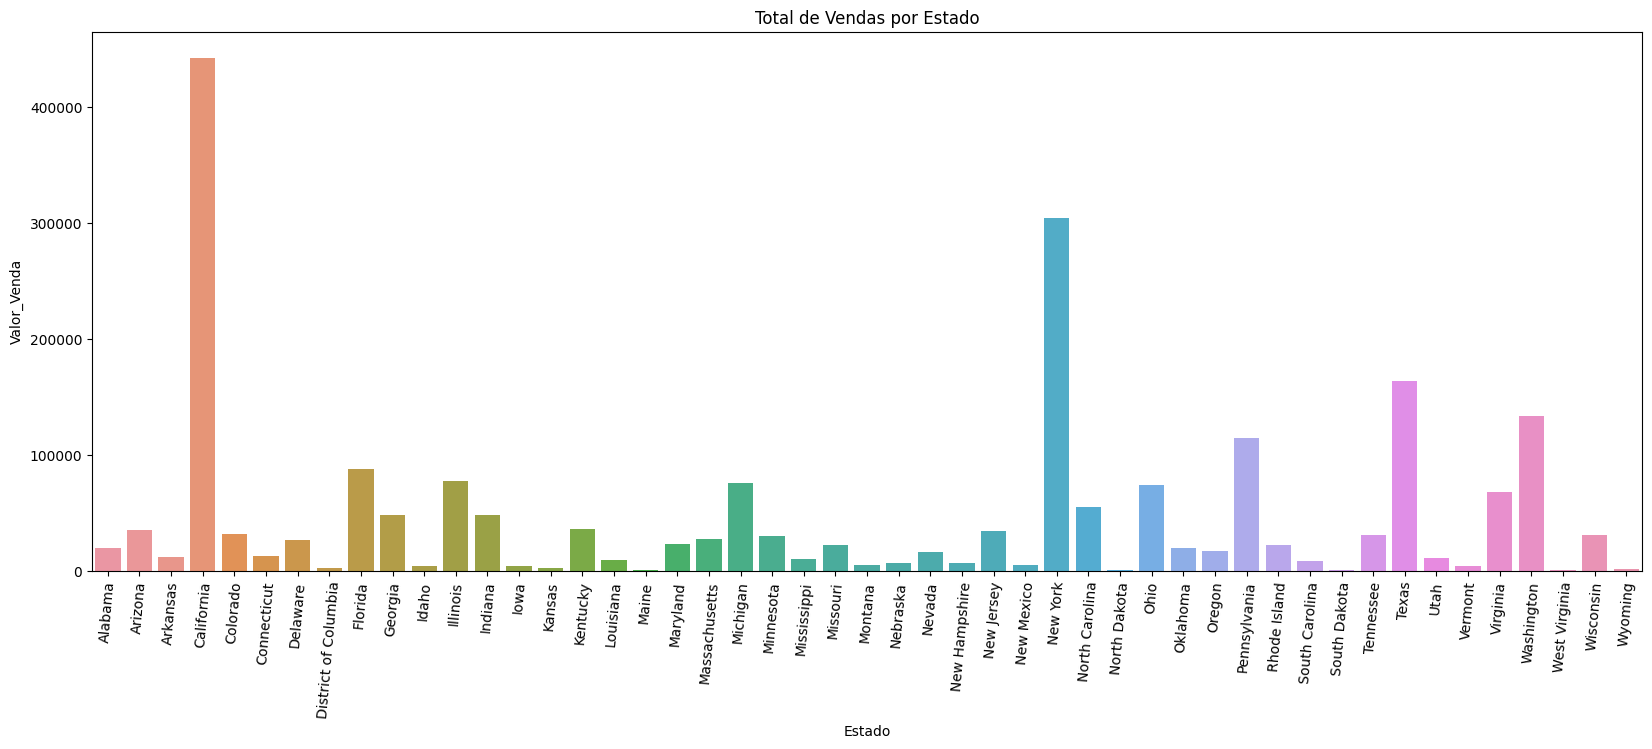

In [69]:
# plotando com seaborn

plt.figure(figsize=(20,7))

# definindo x e y no gráfico
sns.barplot(data = df_p3, y = "Valor_Venda", x = "Estado").set(title = "Total de Vendas por Estado")

# rotacionando os nomes para não ficar um por cima do outro
plt.xticks(rotation = 85)
plt.show()


## Pergunta 4: Quais São as 10 Cidades com Maior Total de Vendas? Demonstre o resultado através de um gráfico de barras.

In [76]:
# novo dataframe agrupado por cidade e valor de venda, ele soma o total de cada cidade, cria um novo índice e ordena os valores de maneira decrescente usando o "Valor_Venda"

df_p4 = df.groupby("Cidade")["Valor_Venda"].sum().reset_index().sort_values(by = "Valor_Venda", ascending = False).head(10)

In [77]:
df_p4.head(10) # visualizando o resultado em dataframe

,Cidade,Valor_Venda
327,New York City,251749.2190
265,Los Angeles,171654.6330
450,Seattle,114725.4780
436,San Francisco,107489.9520
372,Philadelphia,107197.8030
207,Houston,61590.1868
435,San Diego,47458.3790
80,Chicago,46974.3430
216,Jacksonville,44713.1830
123,Detroit,42446.9440


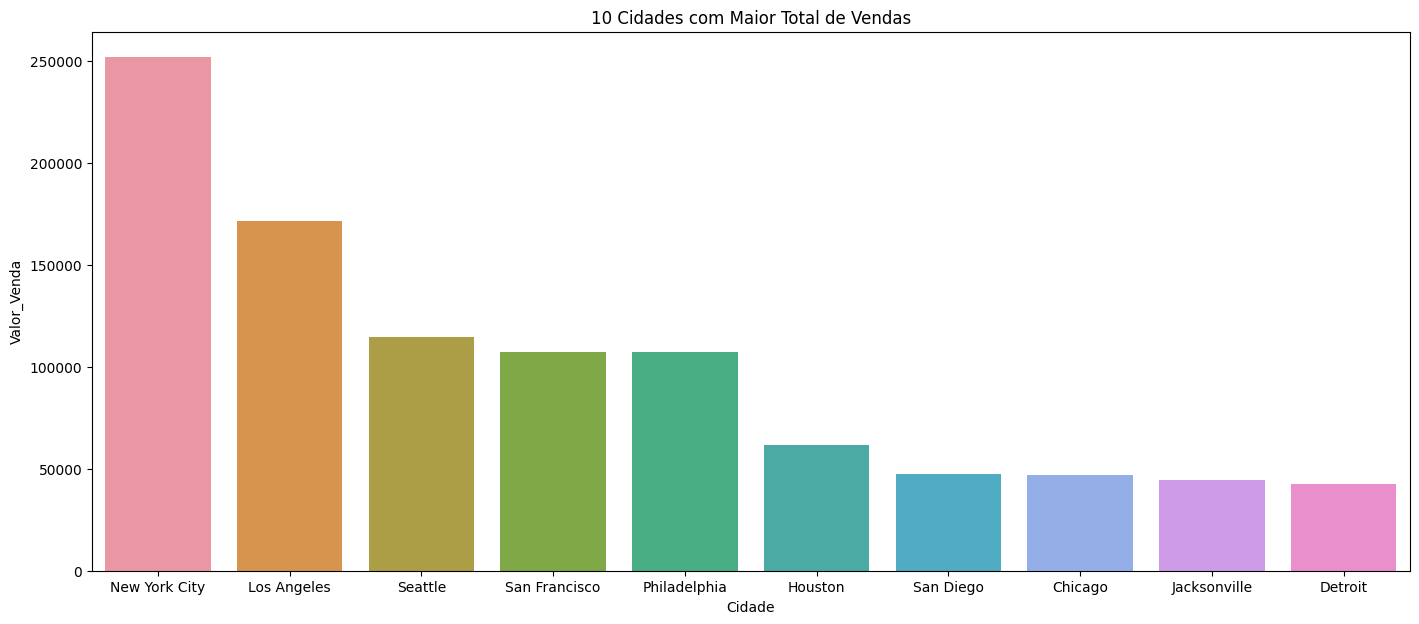

In [87]:
# plotando. Como definimos o dataset novo com apenas os top10, o gráfico ficará visível tranquilamente. Isso não seria possível se tivéssemos criado uma cópia com todos os valores.

plt.figure(figsize=(17,7))
sns.barplot(data = df_p4, y = "Valor_Venda", x = "Cidade").set(title = "10 Cidades com Maior Total de Vendas")
plt.show()

## Pergunta 5: Qual Segmento Teve o Maior Total de Vendas? Demonstre o resultado através de um gráfico de pizza.